Naveeda Ali 
<br>
Date: Feb. 14, 2023
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__40 points__
     
- Part (b) /__60 points__


# <center><font color=#46769B>Exercise 6: Introduction to Markov Chain Monte Carlo sampling</font></center>

## <font color=#46769B>Introduction:</font>

Our goals for this notebook are:
- Gain familiarity with MCMC methods for PDFs of discrete and continuous variables.
- Implement the Metropolis MCMC algorithm for some familiar PDFs.

Required reading:
- *Lesson 6: Markov Chain Monte Carlo sampling*

## <font color=#46769B>Part (a)</font>

Here we implement Markov Chain Monte Carlo (MCMC) sampling using the Metropolis algorithm for the simplest sampling problem, flipping a coin. The target PDF $P(x)$ is a Bernoulli distribution with probability $p = 0.7$ for heads $(x=1)$ and probability $1-p$ for tails $(x=0)$:

$$P(x) = \left\{ \begin{array}{cl} p & x=1  \\ 1-p & x=0  \end{array} \right. \, .$$

Generate $N=10^5$ samples for $x$ from $P(x)$ using the Metropolis algorithm, with the following inputs:
- Select $x_0 = 0$ for the initial point in your chain
- Choose a transition probability defined by the following PDFs:

$$Q(x|0) = \left\{ \begin{array}{cl} q & x=1  \\ 1-q & x=0 \end{array} \right. \, , \qquad 
Q(x|1) = \left\{ \begin{array}{cl} 1-q & x=1  \\ q & x=0 \end{array} \right. \, .$$

&emsp;&emsp; where $q = 0.4$.

Calculate the mean $\langle x \rangle$ and standard deviation $\Delta x$ of your samples, and compare to the true mean $\mu = p$ and true standard deviation $\sigma = \sqrt{p (1-p)}$ for $P(x)$, respectively.

Hint: This problem was solved in Lesson 6 notes for the case where $q=0.5$. You will have to modify the code to the case where $q=0.4$.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

#Probabilities
q = 0.4
p = 0.7
#Number of samples
num = 10**5

#PDF
def P(x):
    if x == 1:
        return p
    elif x == 0:
        return 1-p
    else:
        return 0
           
# Initialize the first value in the chain [x0]
x_samples = [0]

for i in range(num-1):
    # Previous value of x
    x_old = x_samples[i]
    
    if x_samples[i-1] == 0:
        x_new = np.random.choice([0, 1], p=[1-q, q])
    else:
        x_new = np.random.choice([0, 1], p=[q, 1-q])
    
    # Acceptance ratio
    A = P(x_new)/P(x_old)
    
    # Check whether accept or reject
    
    # Accept always
    if A > 1:
        x_samples.append(x_new)
    # Accept with probability A
    else:
        # Randomly decide to accept
        r = np.random.rand()
        if r < A:
            x_samples.append(x_new)
        else:
            x_samples.append(x_old)
           
mean_x = np.mean(x_samples)
sigma_x = np.std(x_samples)
true_sigma = np.sqrt(p-(1-p))
print('The true mean of the x samples is', p)
print('The mean of the x samples is', mean_x)
print('The true standard deviation of x is', true_sigma)
print('The standard deviation of x samples is', sigma_x)


The true mean of the x samples is 0.7
The mean of the x samples is 0.72872
The true standard deviation of x is 0.6324555320336758
The standard deviation of x samples is 0.44462024425345276


## <font color=#46769B>Part (b)</font>

In Assignment 4, we introduced the following PDF describing the distributions of photon frequencies $\nu$ emitted from a blackbody of temperature $T$:

$$P_\nu(\nu) = \left\{ \begin{array}{cc} \frac{C\nu^2 h^3}{(k_B T)^3} \left(e^{\frac{h \nu}{k_B T}} -1 \right)^{-1} & {\rm for} \; \nu > 0 \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (1)$$

where $C = 0.415954$ is a numerical constant. We also have Planck's constant $h$ and Boltzmann's constant $k_B$. For simplicity, let's define $x = h \nu / k_B T$. In terms of $x$, the PDF is now

$$P_x(x) = \left\{ \begin{array}{cc} \frac{C x^2}{e^{x} -1} & {\rm for} \; x > 0 \\
0 & {\rm otherwise} \end{array} \right. \, , \qquad (2)$$

Here are your tasks:

- Write a code implementing the Metropolis MCMC algorithm, generate $N = 10^5$ samples for $x$ from $P_x(x)$.

    - Use a normal distribution for the transition PDF $Q(x|x^\prime)$, with step width $\sigma_q$.
    
    - You are free to choose the starting element of your chain, $x_0$, and the width of your transition PDF, $\sigma_q$.

- Plot the first 1000 entries in your chain, $x_i$ vs $i$. Choose a value of $x_0$ such that there is no burn-in period in your chain.

- Calculate the __acceptance fraction__ of your chain:

$$f_{\rm accept} = \frac{N_{\rm accept}}{N}$$

where $N_{\rm accept}$ is the number of times your algorithm accepts the new sample during the acceptance/rejection step.
Tune the value of $\sigma_q$ so that the acceptance fraction of your chain is in the range $30-50\%$.

- Plot a histogram of your samples and compare to the PDF $P(x)$.

- Calculate the mean $\langle x \rangle$ and the standard deviation $\Delta x$.

To convert your samples to physical units, say, wavelength $\lambda$, you use the formula

$$\lambda = \frac{c}{\nu} = \frac{ c h}{k_B T x}$$

where $c$ is the speed of light.

- Assuming the Sun is a blackbody with temperature $T = 5800 \; K$, use the above formula to determine the percentage of the number of photons and the percentage of the Sun's energy within the range the visible range $380 - 700$ nm.



The acceptance fraction is 0.41904
The mean of the x samples is 2.6717241395031923
The standard deviation of x samples is 1.7379233435532264


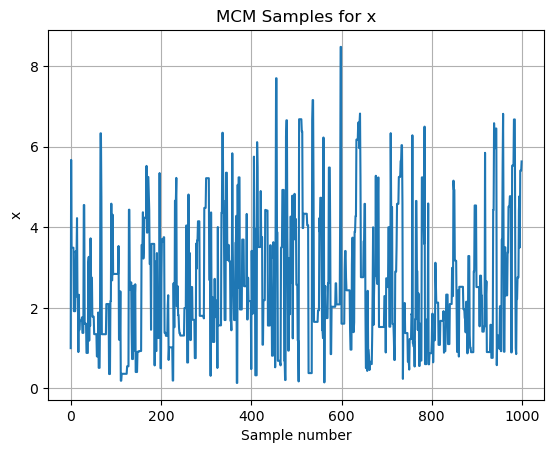

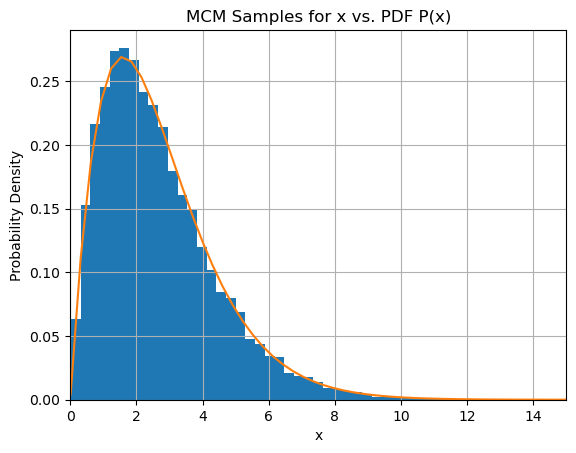

The percentage of photons in the visible spectrum is = 22.482%
The percentage Suns energy in the visible spectrum range is =  38.889%


In [73]:
# Here are the numerical constants in SI units
h = 6.62607015e-34
kB = 1.380649e-23
c = 299792458
T = 5800
C= 0.415954

#Number of samples
num = 10**5

#PDF P(x)
def Px(x):
    return (C*x**2)/(np.exp(x)-1)

def convert_to_wavelength(x):
    return (h*c*10**9)/(kB*T*x)

#Initialize first value in chain
x_samples = [1]
#Set sigma q value 
sigma_q =3.8
#Initialize acceptance counter
accept_count = 0

for i in range(num-1):
    # Previous value of x
    x_old = x_samples[i]
    x_new = np.random.normal(x_old, sigma_q) 
    
    # Acceptance ratio
    A = Px(x_new)/Px(x_old)

    # Check whether accept or reject
    # Accept always
    if A > 1:
        x_samples.append(x_new)
        accept_count += 1
    # Accept with probability A
    else:
        # Randomly decide to accept
        r = np.random.rand()
        if r < A:
            x_samples.append(x_new)
            accept_count += 1
        else:
            x_samples.append(x_old)
            

#Calculate acceptance fraction
print('The acceptance fraction is',(accept_count/num))

#Calculate mean and standard deviation of x sample s
mean_x = np.mean(x_samples)
sigma_x = np.std(x_samples)
print('The mean of the x samples is', mean_x)
print('The standard deviation of x samples is', sigma_x)

#Plot of x samples 
plt.plot(x_samples[:1000])
plt.title('MCM Samples for x')
plt.xlabel('Sample number')
plt.ylabel('x')
plt.grid()
plt.show()

#Plot histogram of x samples and PDF 
x = np.linspace(0.01,15)
plt.hist(x_samples,density=True,bins=50, label='MCM samples for x')
plt.plot(x,Px(x), label='PDF P(x)')
plt.title('MCM Samples for x vs. PDF P(x)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.xlim([0,15])
plt.grid()
plt.show()


x_samples = np.array(x_samples)
wavelengths = convert_to_wavelength(x_samples)
v= C/wavelengths
visible_photons = np.sum((wavelengths >= 380) & (wavelengths <= 700))
percentage_photons = visible_photons / num * 100
print(f"The percentage of photons in the visible spectrum is = {percentage_photons:.3f}%")
energy = np.sum(h*v*((wavelengths >= 380) & (wavelengths <= 700))) 
energyT = np.sum(h * v)
energyP = energy / energyT * 100
print(f"The percentage Suns energy in the visible spectrum range is =  {energyP:.3f}%")